# **Path Finder**

A classification project designed to predict field of career for students using a dataset from Kaggle, which includes academic performance, experience, and skills. 

**Goal : Predicting a suitable field for student**

## Problem and Task Understanding

Since the output of this project is displaying a suitable field of career for students and there are numerous of fields, this project belongs to the multi-classification. For this project, F1-score will be used for the evaluation metrics as it makes the observation of the model easier, such as the distribution of the data or some anomalies. The higher the F1-score, the better the model is. By the end of this model training, the expected performance is 75%.

# Setup

In this phase, some necessary libraries will be imported and the dataset is loaded and observed. By the end of this phase, it is hoped that there are some insights that can be gathered to guide the preprocessing and analysis phases effectively.

In [131]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [132]:
# Load Dataset
url = 'career_path_in_all_field.csv'
raw_df = pd.read_csv(url)
raw_df.head()

,Field,Career,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications
0,Engineering,Urban Planner,3.530439,5,0,2,0,3,1,4,4,2,2,1,0,1,1
1,Chemistry,Art Director,4.018247,1,2,0,0,8,1,3,4,0,3,0,3,0,1
2,Engineering,Chemist,4.636733,1,0,0,0,5,0,1,1,1,2,2,3,4,1
3,Physics,Manager,4.052693,3,1,3,0,1,0,4,1,3,1,2,1,2,0
4,Law,Education Administrator,4.834850,0,2,4,0,0,0,4,4,3,4,4,3,2,0


In [133]:
# Dataset Description
raw_df.describe()

,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,3.740375,4.514556,0.999778,2.009556,0.509778,4.500333,0.506556,2.010111,1.987444,2.011111,2.009556,2.005111,1.984111,1.989444,0.497667
std,0.719551,2.866867,0.816950,1.422330,0.499932,2.877968,0.499985,1.418062,1.411129,1.411260,1.411979,1.418441,1.419497,1.411539,0.500022
min,2.500093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.105267,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,3.739713,5.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,4.361090,7.000000,2.000000,3.000000,1.000000,7.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,4.999803,9.000000,2.000000,4.000000,1.000000,9.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [134]:
# Dataset Info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Field                       9000 non-null   object 
 1   Career                      9000 non-null   object 
 2   GPA                         9000 non-null   float64
 3   Extracurricular_Activities  9000 non-null   int64  
 4   Internships                 9000 non-null   int64  
 5   Projects                    9000 non-null   int64  
 6   Leadership_Positions        9000 non-null   int64  
 7   Field_Specific_Courses      9000 non-null   int64  
 8   Research_Experience         9000 non-null   int64  
 9   Coding_Skills               9000 non-null   int64  
 10  Communication_Skills        9000 non-null   int64  
 11  Problem_Solving_Skills      9000 non-null   int64  
 12  Teamwork_Skills             9000 non-null   int64  
 13  Analytical_Skills           9000 

Based on the information of the dataset, there are 9000 entries along with 17 features, all of which contain no missing value yet encompassing various data types, such as object, integer, and float. Therefore, it is ready to proceed to the next phase.

# Data Preprocessing

After observing the data, this phase aims to clean, preprocess, and organize the data for analysis. Hopefully, the dataset is ready to be used for training the model later after going through this phase.

In [135]:
# Copy a Dataset
df = raw_df.copy()

In [136]:
# Check Duplicate
duplicated = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicated}")

Number of duplicate rows: 0


In [137]:
# Split the Data Types
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

## Univariate Data Visualization

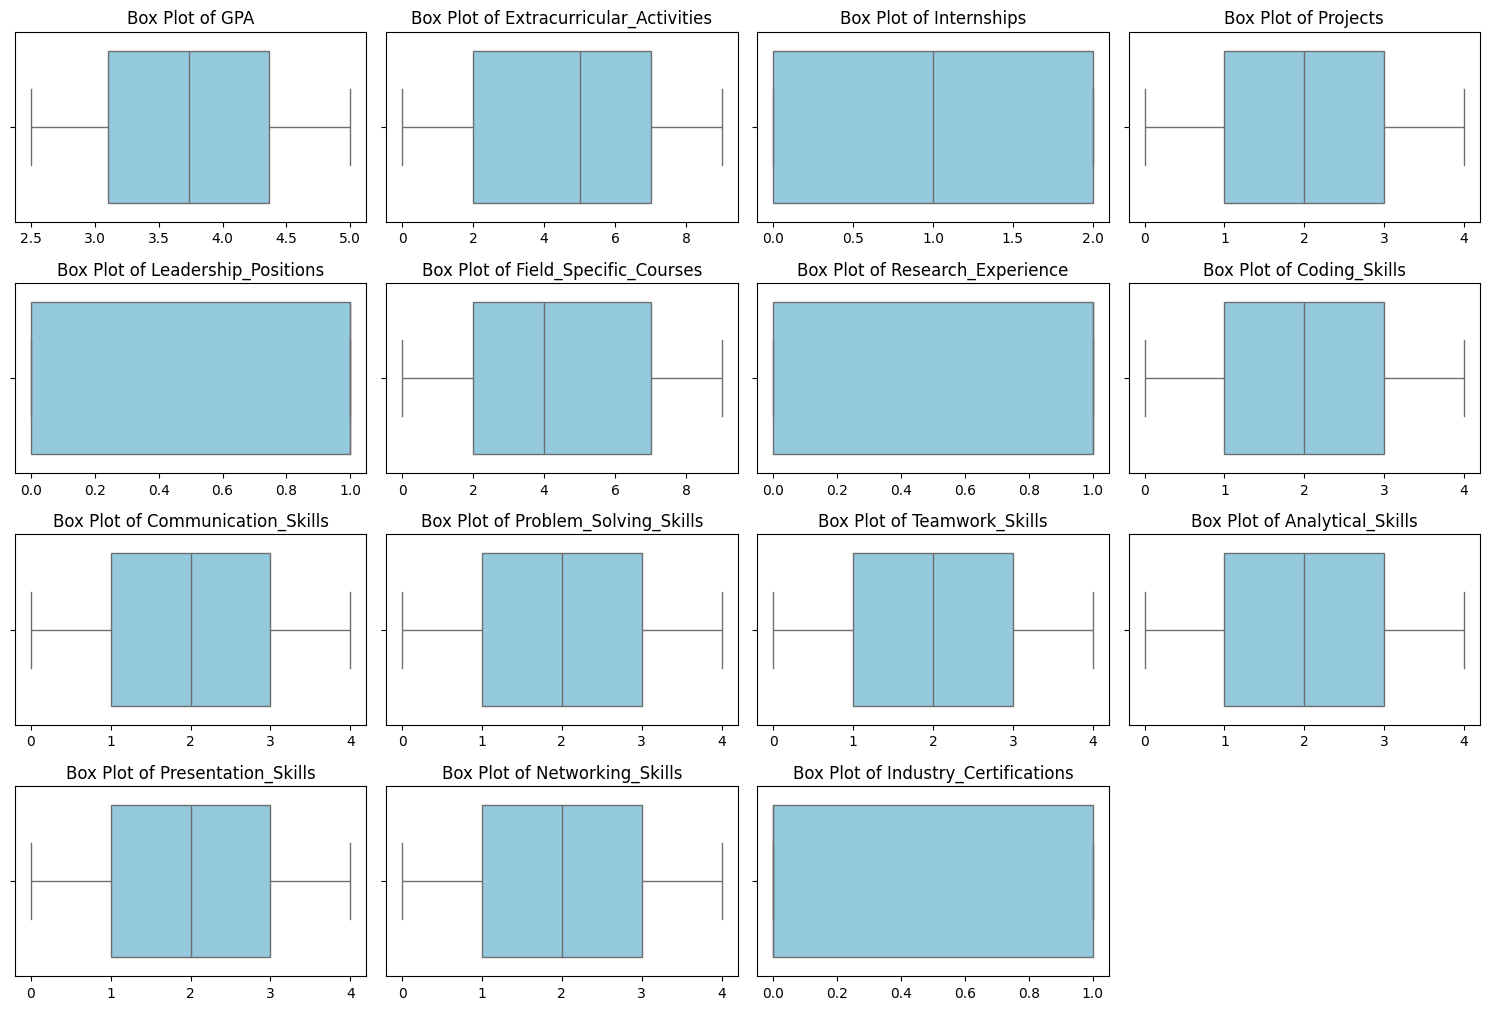

In [138]:
# Univariate for Numerical Features
fig, axes = plt.subplots(nrows=len(numerical_features) // 3 + 1, ncols=4, figsize=(15, 15))
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

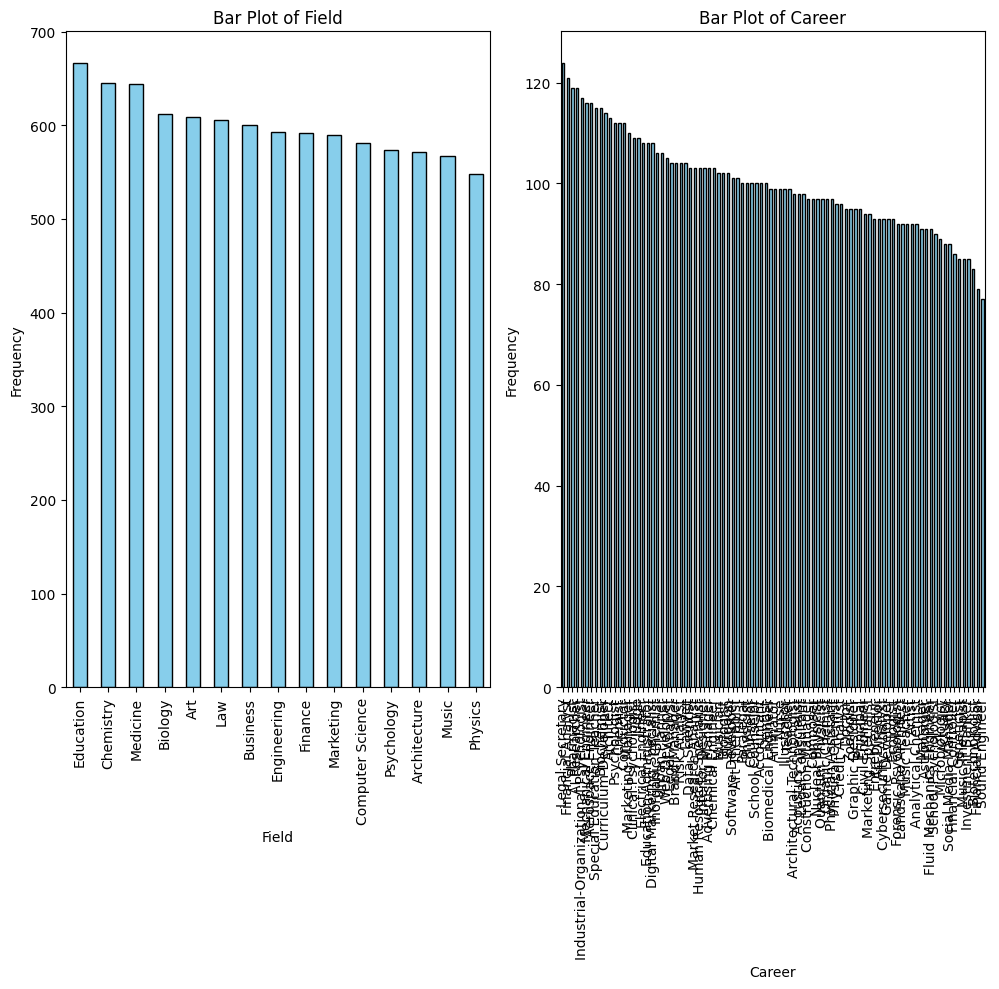

In [139]:
# Univariate for Categorical Features
fig, axes = plt.subplots(nrows=len(categorical_features) // 3 + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Bar Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [140]:
# Check the Unique Value of Career Column
print(f"Number of unique value of career features are {df['Career'].unique().size}")

Number of unique value of career features are 90


## Encoding

In [141]:
# Import Library
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [142]:
# Encode Field
label_encoder = LabelEncoder()
df['Field'] = label_encoder.fit_transform(df['Field'])
df.head()

,Field,Career,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications
0,7,Urban Planner,3.530439,5,0,2,0,3,1,4,4,2,2,1,0,1,1
1,4,Art Director,4.018247,1,2,0,0,8,1,3,4,0,3,0,3,0,1
2,7,Chemist,4.636733,1,0,0,0,5,0,1,1,1,2,2,3,4,1
3,13,Manager,4.052693,3,1,3,0,1,0,4,1,3,1,2,1,2,0
4,9,Education Administrator,4.834850,0,2,4,0,0,0,4,4,3,4,4,3,2,0


In [143]:
# Target Encoding for Career
def target_encode(train_series, target, min_samples_leaf=1, smoothing=1):
    """
    Perform target encoding with smoothing.
    """
    # Compute target mean
    averages = target.groupby(train_series).agg(['mean', 'count'])
    smoothing_factor = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
    prior = target.mean()
    # Smoothing
    averages['mean'] = prior * (1 - smoothing_factor) + averages['mean'] * smoothing_factor
    return averages['mean']

# Apply target encoding with K-Fold to prevent leakage
def kfold_target_encoding(df, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    df['Career_Encoded'] = 0
    for train_idx, val_idx in kf.split(df):
        train, val = df.iloc[train_idx], df.iloc[val_idx]
        means = target_encode(train['Career'], train['Field'])
        df.loc[val_idx, 'Career_Encoded'] = val['Career'].map(means)
    return df

df = kfold_target_encoding(df)
df.head()

,Field,Career,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications,Career_Encoded
0,7,Urban Planner,3.530439,5,0,2,0,3,1,4,4,2,2,1,0,1,1,6.897727
1,4,Art Director,4.018247,1,2,0,0,8,1,3,4,0,3,0,3,0,1,6.890411
2,7,Chemist,4.636733,1,0,0,0,5,0,1,1,1,2,2,3,4,1,6.228916
3,13,Manager,4.052693,3,1,3,0,1,0,4,1,3,1,2,1,2,0,7.462687
4,9,Education Administrator,4.834850,0,2,4,0,0,0,4,4,3,4,4,3,2,0,7.720930


In [144]:
# Drop Career Column
df = df.drop(columns='Career')
df.head()

,Field,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications,Career_Encoded
0,7,3.530439,5,0,2,0,3,1,4,4,2,2,1,0,1,1,6.897727
1,4,4.018247,1,2,0,0,8,1,3,4,0,3,0,3,0,1,6.890411
2,7,4.636733,1,0,0,0,5,0,1,1,1,2,2,3,4,1,6.228916
3,13,4.052693,3,1,3,0,1,0,4,1,3,1,2,1,2,0,7.462687
4,9,4.834850,0,2,4,0,0,0,4,4,3,4,4,3,2,0,7.720930


In [145]:
# Description after Encoding
df.describe()

,Field,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications,Career_Encoded
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,6.934333,3.740375,4.514556,0.999778,2.009556,0.509778,4.500333,0.506556,2.010111,1.987444,2.011111,2.009556,2.005111,1.984111,1.989444,0.497667,6.934678
std,4.272476,0.719551,2.866867,0.816950,1.422330,0.499932,2.877968,0.499985,1.418062,1.411129,1.411260,1.411979,1.418441,1.419497,1.411539,0.500022,0.448850
min,0.000000,2.500093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.852273
25%,3.000000,3.105267,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.626866
50%,7.000000,3.739713,5.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,6.922222
75%,11.000000,4.361090,7.000000,2.000000,3.000000,1.000000,7.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,7.227273
max,14.000000,4.999803,9.000000,2.000000,4.000000,1.000000,9.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,8.642857


## Multivariate Data Visualization

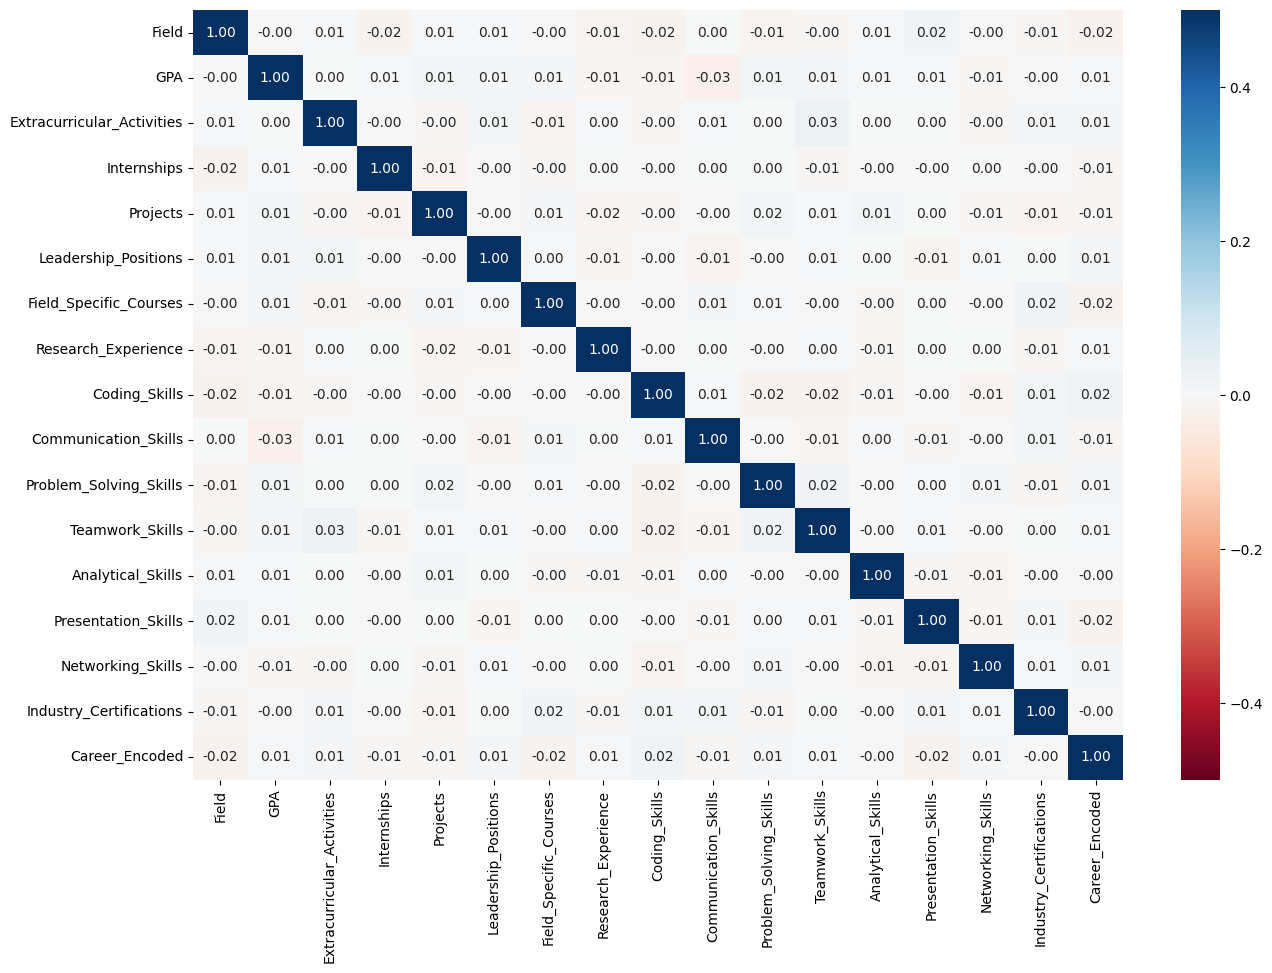

In [146]:
# Multivariate by Heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), vmax=0.5, vmin=-0.5, annot=True, fmt=".2f", cmap='RdBu')
plt.show()

<Axes: ylabel='Density'>

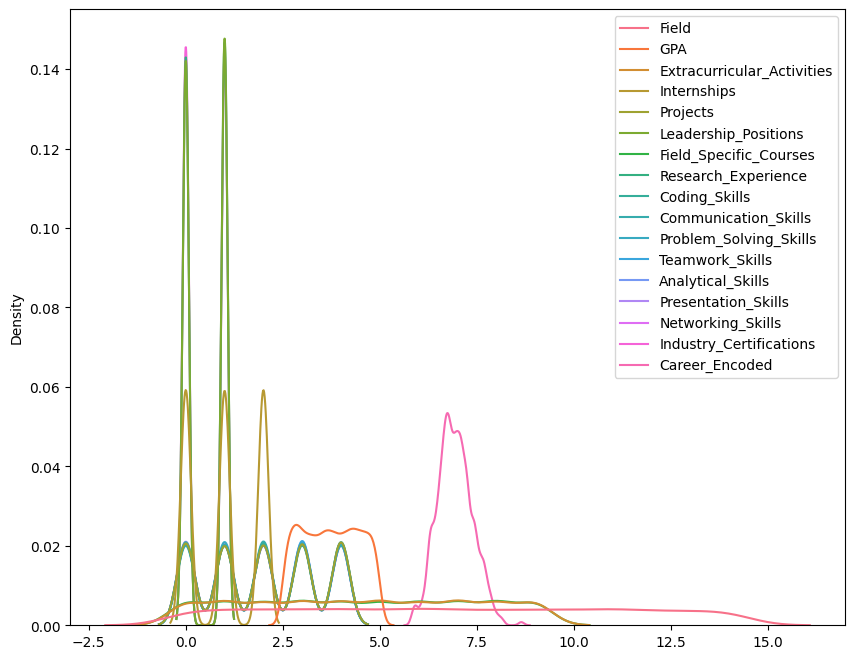

In [147]:
# Visualize the Dispersion of the Features
plt.figure(figsize=(10, 8))
sns.kdeplot(df)

## Standardization

In [148]:
# Assign Independence and Target Feature
X, y = df.loc[:, df.columns != 'Field'], df.loc[:, 'Field']

In [149]:
# Import Minmax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,GPA,Extracurricular_Activities,Internships,Projects,Leadership_Positions,Field_Specific_Courses,Research_Experience,Coding_Skills,Communication_Skills,Problem_Solving_Skills,Teamwork_Skills,Analytical_Skills,Presentation_Skills,Networking_Skills,Industry_Certifications,Career_Encoded
0,0.412186,0.555556,0.0,0.50,0.0,0.333333,1.0,1.00,1.00,0.50,0.50,0.25,0.00,0.25,1.0,0.374636
1,0.607332,0.111111,1.0,0.00,0.0,0.888889,1.0,0.75,1.00,0.00,0.75,0.00,0.75,0.00,1.0,0.372015
2,0.854755,0.111111,0.0,0.00,0.0,0.555556,0.0,0.25,0.25,0.25,0.50,0.50,0.75,1.00,1.0,0.134969
3,0.621112,0.333333,0.5,0.75,0.0,0.111111,0.0,1.00,0.25,0.75,0.25,0.50,0.25,0.50,0.0,0.577088
4,0.934011,0.000000,1.0,1.00,0.0,0.000000,0.0,1.00,1.00,0.75,1.00,1.00,0.75,0.50,0.0,0.669629


<Axes: ylabel='Density'>

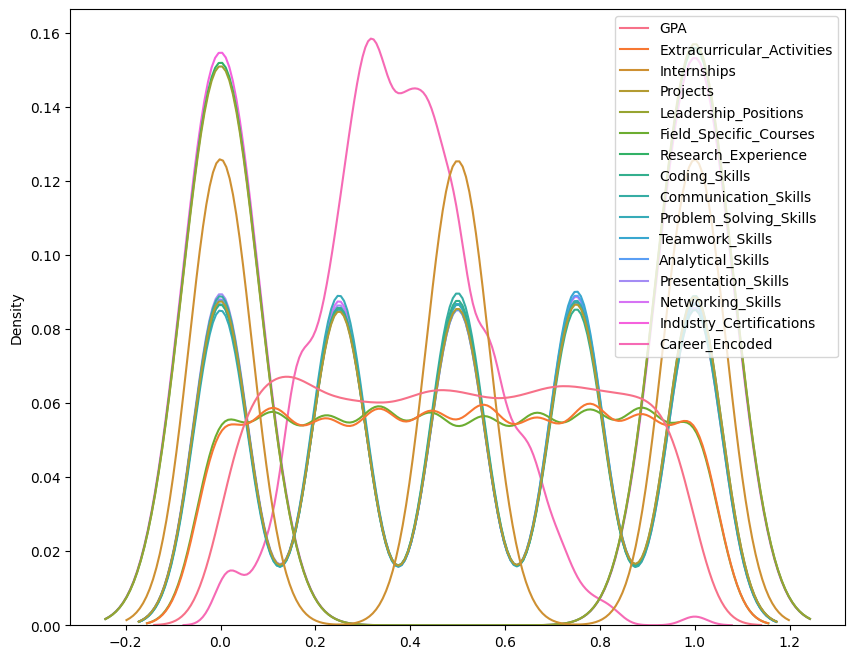

In [150]:
# Visualize the Scaled Dispersion
plt.figure(figsize=(10, 8))
sns.kdeplot(X_scaled)

## Dimensionality Reduction

In [151]:
# Import Library
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors

Cumulative Explained Variance: [0.11347522 0.22552398 0.33634567 0.41119917 0.47000352]


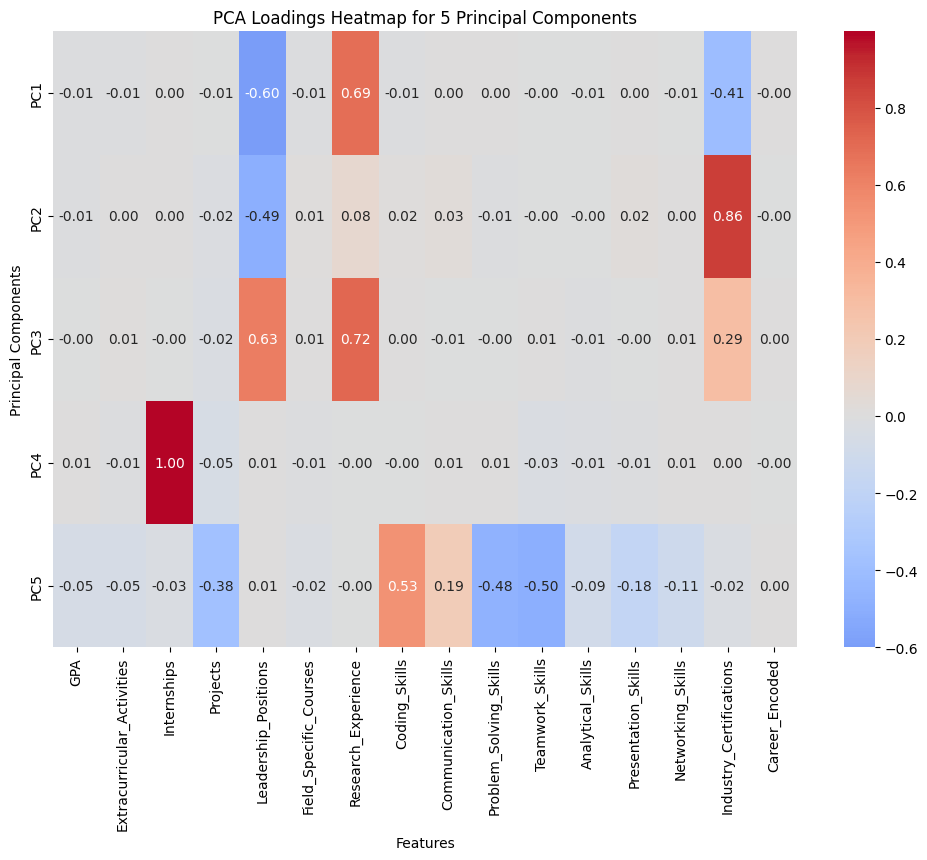

In [155]:
# Initialize LDA
pca = PCA(n_components=5)

# Fit and transform the data
principalComponents = pca.fit_transform(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

loadings = pca.components_

loadings_df = pd.DataFrame(loadings, 
                           columns=X_scaled.columns, 
                           index=[f'PC{i+1}' for i in range(5)])

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('PCA Loadings Heatmap for 5 Principal Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
#          np.cumsum(pca.explained_variance_ratio_), marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Scree Plot')
# plt.show()

# plt.matshow(pca.components_, cmap='viridis')

# # Add color bar and axis labels
# plt.yticks([0, 1], ['PC1', 'PC2'])
# plt.colorbar()
# plt.xticks(range(len(X_scaled.columns)), X_scaled.columns, ha='left', rotation=60)
# plt.xlabel('Feature')
# plt.ylabel('Principle Component')

# # Add values to the heatmap cells
# for (i, j), val in np.ndenumerate(pca.components_):
#     plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='white' if abs(val) < 0.5 else 'black')

# plt.show()

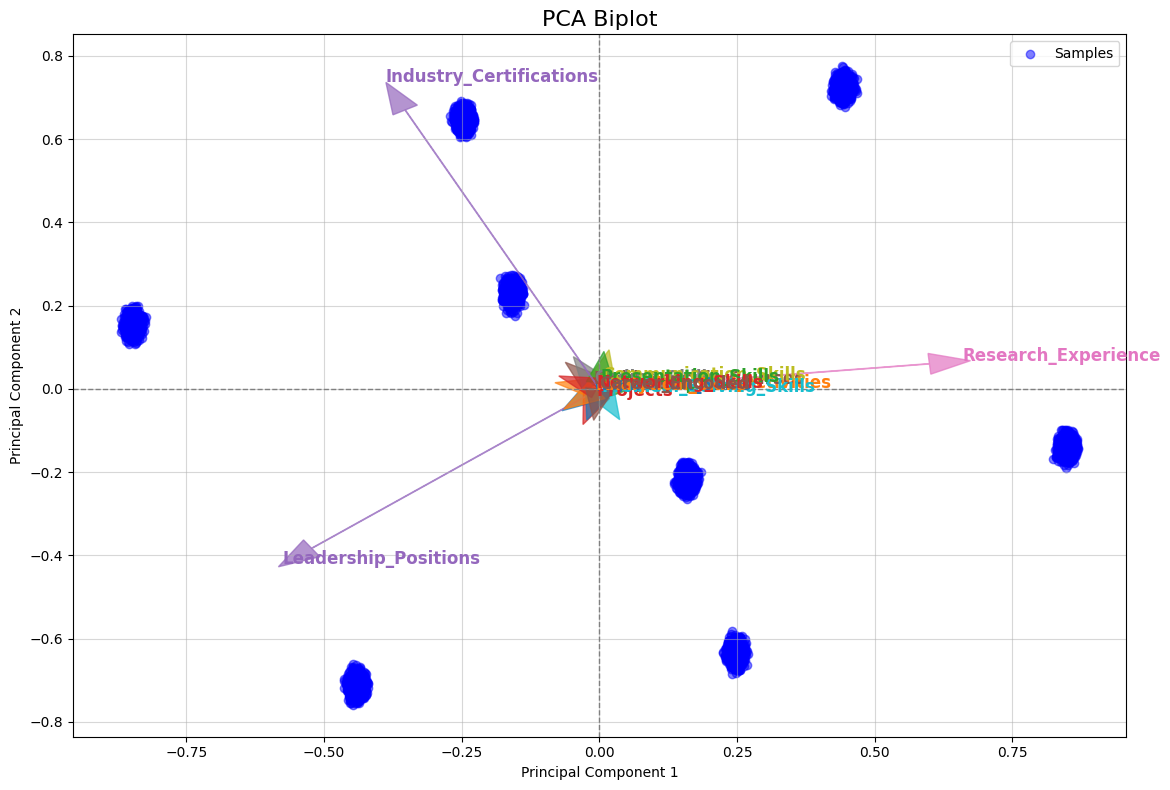

In [156]:
loadings = pca.components_.T

colors = list(mcolors.TABLEAU_COLORS.values())

# Biplot function
def biplot(score, loadings, features, labels=None):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot of PCA-transformed samples
    xs = score[:, 0]
    ys = score[:, 1]
    plt.scatter(xs, ys, c='blue', alpha=0.5, label='Samples')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Biplot', fontsize=16)

    # Plot the feature vectors (loadings) with distinct colors
    for i, feature in enumerate(features):
        plt.arrow(0, 0, loadings[i, 0] * max(xs), loadings[i, 1] * max(ys), 
                  color=colors[i % len(colors)], alpha=0.7, head_width=0.05)
        # Shift text position slightly for better separation
        plt.text(loadings[i, 0] * max(xs) * 1.1, loadings[i, 1] * max(ys) * 1.1, 
                 feature, color=colors[i % len(colors)], fontsize=12, fontweight='bold')

    # Improve visual appearance
    plt.axhline(0, color='grey', linestyle='--', linewidth=1)
    plt.axvline(0, color='grey', linestyle='--', linewidth=1)
    plt.grid(True, alpha=0.5)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Call the biplot function
biplot(principalComponents, loadings, X_scaled.columns)

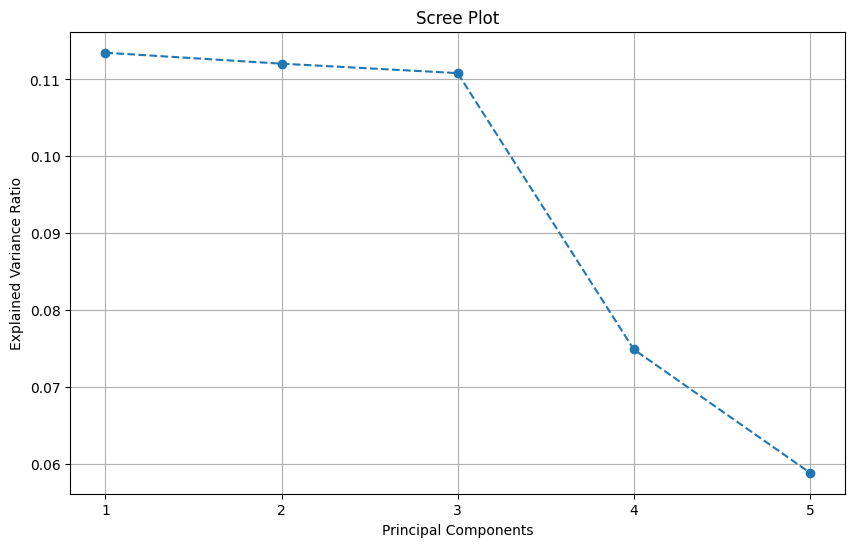

In [157]:
explained_variance = pca.explained_variance_ratio_

# Step 4: Plot the Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

# Model Benchmarking

Next, the preprocessed data will be fitted with the model. Because there are numerous classification models, the model benchmarking is necessary to find the suitable model for this project. This phase will limit the number of the models to 5 that consist of
1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest
4. Super Vector Machine
5. Gradient Boost Machine